Explore and load different types of bars.

In [2]:
import sys; print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend(['/Users/scottblunsden/Programs/FinML'])

import dataproc.reader as rd
import dataproc.bars as bar
import pandas as pd
from termcolor import cprint

data_path = '/Users/scottblunsden/Programs/FinML/data/raw/'
file_name = 'IVE_tickbidask'
file_ext = '.parq'

Python 3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] on darwin


In [3]:
parq_file_path = data_path+file_name+file_ext
# Load from parquet
df = pd.read_parquet(parq_file_path)
print(df.head())
print(df.info(verbose=True))


/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


                     price    bid    ask  size    v        dv
dates                                                        
2009-09-28 09:30:00  50.79  50.70  50.79   100  100   5079.00
2009-09-28 09:30:00  50.71  50.70  50.79   638  638  32352.98
2009-09-28 09:31:32  50.75  50.75  50.76   100  100   5075.00
2009-09-28 09:31:33  50.75  50.72  50.75   100  100   5075.00
2009-09-28 09:31:50  50.75  50.73  50.76   300  300  15225.00


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1569099 entries, 2009-09-28 09:30:00 to 2019-02-22 18:30:00
Data columns (total 6 columns):
price    1569099 non-null float64
bid      1569099 non-null float64
ask      1569099 non-null float64
size     1569099 non-null int64
v        1569099 non-null int64
dv       1569099 non-null float64
dtypes: float64(4), int64(2)
memory usage: 83.8 MB
None


In [4]:
n_ticks = df.shape[0]
volume_ratio = (df.v.sum()/n_ticks).round()
dollar_ratio = (df.dv.sum()/n_ticks).round()
print(f'num ticks: {n_ticks:,}')
print(f'volume ratio: {volume_ratio}')
print(f'dollar ratio: {dollar_ratio}')

num ticks: 1,569,099
volume ratio: 550.0
dollar ratio: 47849.0


In [5]:
bars = bar.Bars()
tick_M = 100 # arbitrary
print(f'tick threshold: {tick_M:,}')
tick_df = bars.tick_bar_df(df, 'price', tick_M)
n_ticks = tick_df.shape[0]
volume_ratio = (df.v.sum()/n_ticks).round()
dollar_ratio = (df.dv.sum()/n_ticks).round()
print(f'num ticks: {n_ticks:,}')
print(f'volume ratio: {volume_ratio}')
print(f'dollar ratio: {dollar_ratio}')

print(tick_df.head())
print(tick_df.info(verbose=True))


  0%|          | 0/1569099 [00:00<?, ?it/s]

 10%|█         | 163190/1569099 [00:00<00:00, 1631885.99it/s]

 21%|██▏       | 337122/1569099 [00:00<00:00, 1662695.65it/s]

tick threshold: 100


 33%|███▎      | 523890/1569099 [00:00<00:00, 1719301.50it/s]

 44%|████▎     | 684869/1569099 [00:00<00:00, 1684910.32it/s]

 55%|█████▌    | 864657/1569099 [00:00<00:00, 1717276.51it/s]

 69%|██████▉   | 1079967/1569099 [00:00<00:00, 1828296.08it/s]

 83%|████████▎ | 1298285/1569099 [00:00<00:00, 1922025.06it/s]

 96%|█████████▋| 1513732/1569099 [00:00<00:00, 1986309.89it/s]

100%|██████████| 1569099/1569099 [00:00<00:00, 1903045.70it/s]

num ticks: 15,690
volume ratio: 54969.0
dollar ratio: 4785218.0
                       price    bid    ask  size     v         dv
dates                                                            
2009-09-28 09:53:14  51.1500  51.15  51.18   100   100    5115.00
2009-09-28 10:02:52  51.2500  51.24  51.26  2000  2000  102500.00
2009-09-28 10:22:24  51.1961  51.19  51.20  1100  1100   56315.71
2009-09-28 10:38:44  51.3650  51.36  51.36   100   100    5136.50
2009-09-28 11:24:29  51.3200  51.32  51.33  2000  2000  102640.00
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15690 entries, 2009-09-28 09:53:14 to 2019-02-22 15:22:33
Data columns (total 6 columns):
price    15690 non-null float64
bid      15690 non-null float64
ask      15690 non-null float64
size     15690 non-null int64
v        15690 non-null int64
dv       15690 non-null float64
dtypes: float64(4), int64(2)
memory usage: 858.0 KB
None


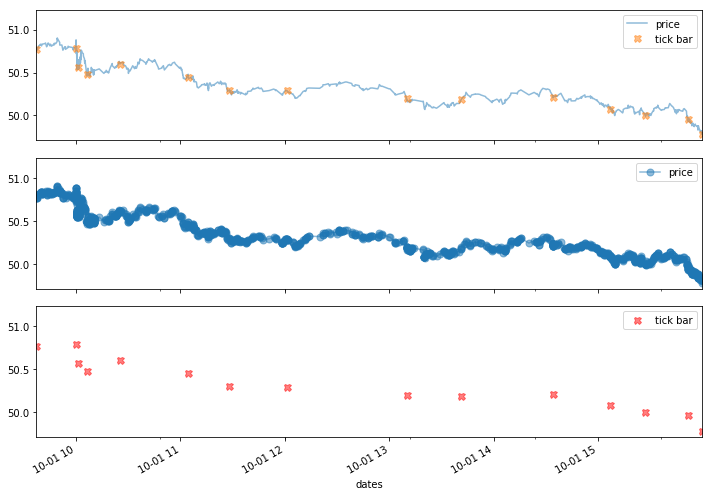

In [6]:
xDate ='2009-10-01' #'2017-10-4'
xdf, xtdf = bars.select_sample_data(df, tick_df,'price',xDate)

xdf.shape, xtdf.shape
bars.plot_sample_data(xdf, xtdf, 'tick bar', alpha=0.5, markersize=7)



In [7]:
sub = tick_df.price
ref = df.price

## uncomment below to run
tick_bars_ohlc = bars.get_ohlc(ref, sub)
print(tick_df.head())
print(tick_df.info(verbose=True))

outfp = data_path+file_name+'_ohlc'+file_ext
tick_bars_ohlc.to_parquet(outfp)

  0%|          | 0/15689 [00:00<?, ?it/s]

  1%|          | 175/15689 [00:00<00:08, 1749.72it/s]

  2%|▏         | 367/15689 [00:00<00:08, 1795.42it/s]

  4%|▎         | 553/15689 [00:00<00:08, 1811.12it/s]

  5%|▍         | 739/15689 [00:00<00:08, 1825.39it/s]

  6%|▌         | 936/15689 [00:00<00:07, 1865.48it/s]

  7%|▋         | 1131/15689 [00:00<00:07, 1889.57it/s]

  8%|▊         | 1303/15689 [00:00<00:07, 1834.33it/s]

  9%|▉         | 1483/15689 [00:00<00:07, 1823.32it/s]

 11%|█         | 1674/15689 [00:00<00:07, 1848.01it/s]

 12%|█▏        | 1860/15689 [00:01<00:07, 1850.67it/s]

 13%|█▎        | 2041/15689 [00:01<00:07, 1828.59it/s]

 14%|█▍        | 2228/15689 [00:01<00:07, 1839.98it/s]

 15%|█▌        | 2410/15689 [00:01<00:07, 1832.81it/s]

 17%|█▋        | 2597/15689 [00:01<00:07, 1842.37it/s]

 18%|█▊        | 2781/15689 [00:01<00:07, 1823.45it/s]

 19%|█▉        | 2966/15689 [00:01<00:06, 1828.82it/s]

 20%|██        | 3154/15689 [00:01<00:06, 1843.44it/s]

 21%|██▏       | 3341/15689 [00:01<00:06, 1849.60it/s]

 22%|██▏       | 3527/15689 [00:01<00:06, 1850.18it/s]

 24%|██▎       | 3716/15689 [00:02<00:06, 1861.36it/s]

 25%|██▍       | 3903/15689 [00:02<00:06, 1863.93it/s]

 26%|██▌       | 4092/15689 [00:02<00:06, 1869.94it/s]

 27%|██▋       | 4279/15689 [00:02<00:06, 1834.43it/s]

 28%|██▊       | 4471/15689 [00:02<00:06, 1857.20it/s]

 30%|██▉       | 4658/15689 [00:02<00:05, 1860.08it/s]

 31%|███       | 4850/15689 [00:02<00:05, 1876.71it/s]

 32%|███▏      | 5038/15689 [00:02<00:05, 1874.38it/s]

 33%|███▎      | 5226/15689 [00:02<00:05, 1859.17it/s]

 35%|███▍      | 5413/15689 [00:02<00:05, 1848.59it/s]

 36%|███▌      | 5603/15689 [00:03<00:05, 1863.15it/s]

 37%|███▋      | 5790/15689 [00:03<00:05, 1841.90it/s]

 38%|███▊      | 5975/15689 [00:03<00:05, 1800.69it/s]

 39%|███▉      | 6167/15689 [00:03<00:05, 1834.55it/s]

 40%|████      | 6351/15689 [00:03<00:05, 1833.09it/s]

 42%|████▏     | 6546/15689 [00:03<00:04, 1865.28it/s]

 43%|████▎     | 6733/15689 [00:03<00:04, 1861.65it/s]

 44%|████▍     | 6920/15689 [00:03<00:04, 1857.78it/s]

 45%|████▌     | 7109/15689 [00:03<00:04, 1865.15it/s]

 47%|████▋     | 7300/15689 [00:03<00:04, 1878.28it/s]

 48%|████▊     | 7488/15689 [00:04<00:04, 1870.84it/s]

 49%|████▉     | 7676/15689 [00:04<00:04, 1863.73it/s]

 50%|█████     | 7866/15689 [00:04<00:04, 1872.21it/s]

 51%|█████▏    | 8054/15689 [00:04<00:04, 1870.33it/s]

 53%|█████▎    | 8246/15689 [00:04<00:03, 1884.86it/s]

 54%|█████▍    | 8435/15689 [00:04<00:03, 1880.11it/s]

 55%|█████▍    | 8627/15689 [00:04<00:03, 1890.71it/s]

 56%|█████▌    | 8817/15689 [00:04<00:03, 1855.97it/s]

 57%|█████▋    | 9003/15689 [00:04<00:03, 1809.15it/s]

 59%|█████▊    | 9186/15689 [00:04<00:03, 1813.44it/s]

 60%|█████▉    | 9368/15689 [00:05<00:03, 1813.82it/s]

 61%|██████    | 9550/15689 [00:05<00:03, 1798.62it/s]

 62%|██████▏   | 9736/15689 [00:05<00:03, 1813.97it/s]

 63%|██████▎   | 9930/15689 [00:05<00:03, 1848.92it/s]

 65%|██████▍   | 10124/15689 [00:05<00:02, 1873.54it/s]

 66%|██████▌   | 10312/15689 [00:05<00:02, 1872.47it/s]

 67%|██████▋   | 10500/15689 [00:05<00:02, 1866.92it/s]

 68%|██████▊   | 10687/15689 [00:05<00:02, 1848.92it/s]

 69%|██████▉   | 10873/15689 [00:05<00:02, 1845.52it/s]

 70%|███████   | 11058/15689 [00:05<00:02, 1842.71it/s]

 72%|███████▏  | 11249/15689 [00:06<00:02, 1861.25it/s]

 73%|███████▎  | 11436/15689 [00:06<00:02, 1812.74it/s]

 74%|███████▍  | 11618/15689 [00:06<00:02, 1794.87it/s]

 75%|███████▌  | 11808/15689 [00:06<00:02, 1823.86it/s]

 76%|███████▋  | 11991/15689 [00:06<00:02, 1819.73it/s]

 78%|███████▊  | 12181/15689 [00:06<00:01, 1842.22it/s]

 79%|███████▉  | 12375/15689 [00:06<00:01, 1869.29it/s]

 80%|████████  | 12565/15689 [00:06<00:01, 1875.62it/s]

 81%|████████▏ | 12758/15689 [00:06<00:01, 1891.53it/s]

 83%|████████▎ | 12951/15689 [00:06<00:01, 1900.88it/s]

 84%|████████▍ | 13142/15689 [00:07<00:01, 1843.92it/s]

 85%|████████▍ | 13327/15689 [00:07<00:01, 1825.79it/s]

 86%|████████▌ | 13515/15689 [00:07<00:01, 1840.26it/s]

 87%|████████▋ | 13710/15689 [00:07<00:01, 1870.20it/s]

 89%|████████▊ | 13899/15689 [00:07<00:00, 1875.80it/s]

 90%|████████▉ | 14088/15689 [00:07<00:00, 1879.48it/s]

 91%|█████████ | 14277/15689 [00:07<00:00, 1865.41it/s]

 92%|█████████▏| 14465/15689 [00:07<00:00, 1867.61it/s]

 93%|█████████▎| 14660/15689 [00:07<00:00, 1889.10it/s]

 95%|█████████▍| 14855/15689 [00:08<00:00, 1904.77it/s]

 96%|█████████▌| 15046/15689 [00:08<00:00, 1905.08it/s]

 97%|█████████▋| 15244/15689 [00:08<00:00, 1926.28it/s]

 98%|█████████▊| 15437/15689 [00:08<00:00, 1910.63it/s]

100%|█████████▉| 15630/15689 [00:08<00:00, 1914.75it/s]

100%|██████████| 15689/15689 [00:08<00:00, 1857.47it/s]

                       price    bid    ask  size     v         dv
dates                                                            
2009-09-28 09:53:14  51.1500  51.15  51.18   100   100    5115.00
2009-09-28 10:02:52  51.2500  51.24  51.26  2000  2000  102500.00
2009-09-28 10:22:24  51.1961  51.19  51.20  1100  1100   56315.71
2009-09-28 10:38:44  51.3650  51.36  51.36   100   100    5136.50
2009-09-28 11:24:29  51.3200  51.32  51.33  2000  2000  102640.00
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15690 entries, 2009-09-28 09:53:14 to 2019-02-22 15:22:33
Data columns (total 6 columns):
price    15690 non-null float64
bid      15690 non-null float64
ask      15690 non-null float64
size     15690 non-null int64
v        15690 non-null int64
dv       15690 non-null float64
dtypes: float64(4), int64(2)
memory usage: 1.5 MB
None



/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:114: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  result = infer_dtype(pandas_collection)


In [8]:
volume_M =  10_000 # arbitrary 
print(f'volume threshold: {volume_M:,}')
v_bar_df = bars.volume_bar_df(df, 'v', volume_M)
print(v_bar_df.head())
print(v_bar_df.info(verbose=True))

  0%|          | 0/1569099 [00:00<?, ?it/s]

 10%|▉         | 151840/1569099 [00:00<00:00, 1518386.97it/s]

 20%|█▉        | 312433/1569099 [00:00<00:00, 1543630.42it/s]

volume threshold: 10,000


 30%|███       | 477658/1569099 [00:00<00:00, 1574682.72it/s]

 41%|████▏     | 648280/1569099 [00:00<00:00, 1611963.31it/s]

 53%|█████▎    | 824121/1569099 [00:00<00:00, 1653265.28it/s]

 64%|██████▍   | 1003281/1569099 [00:00<00:00, 1692465.33it/s]

 76%|███████▌  | 1194710/1569099 [00:00<00:00, 1753419.65it/s]

 89%|████████▊ | 1390275/1569099 [00:00<00:00, 1809552.27it/s]

100%|██████████| 1569099/1569099 [00:00<00:00, 1771402.20it/s]

                     price    bid    ask  size     v        dv
dates                                                         
2009-09-28 09:44:09  50.91  50.91  50.92  1100  1100   56001.0
2009-09-28 09:46:35  51.07  51.05  51.07  3300  3300  168531.0
2009-09-28 09:52:47  51.13  51.13  51.14  2000  2000  102260.0
2009-09-28 09:54:36  51.13  51.11  51.13   400   400   20452.0
2009-09-28 09:54:41  51.14  51.13  51.14   700   700   35798.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66638 entries, 2009-09-28 09:44:09 to 2019-02-22 15:56:48
Data columns (total 6 columns):
price    66638 non-null float64
bid      66638 non-null float64
ask      66638 non-null float64
size     66638 non-null int64
v        66638 non-null int64
dv       66638 non-null float64
dtypes: float64(4), int64(2)
memory usage: 3.6 MB
None


xdf shape: (1466,), xtdf shape: (48,)


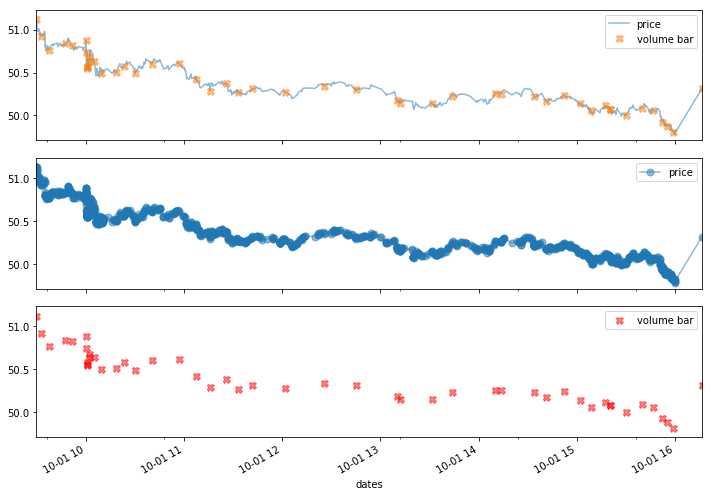

In [9]:
xdf, xtdf = bars.select_sample_data(df, v_bar_df, 'price', xDate)
print(f'xdf shape: {xdf.shape}, xtdf shape: {xtdf.shape}')

bars.plot_sample_data(xdf, xtdf, 'volume bar', alpha=0.5, markersize=7) 

In [10]:
dollar_M =  1_000_000 # arbitrary 
print(f'Dollar volume threshold: {volume_M:,}')
dv_bar_df = bars.dollar_bar_df(df, 'dv', dollar_M)
print(dv_bar_df.head())
print(dv_bar_df.info(verbose=True))

  0%|          | 0/1569099 [00:00<?, ?it/s]

 10%|▉         | 153269/1569099 [00:00<00:00, 1532673.19it/s]

 20%|█▉        | 311503/1569099 [00:00<00:00, 1547238.85it/s]

Dollar volume threshold: 10,000


 30%|███       | 476018/1569099 [00:00<00:00, 1575365.59it/s]

 42%|████▏     | 654392/1569099 [00:00<00:00, 1632575.51it/s]

 53%|█████▎    | 837508/1569099 [00:00<00:00, 1687472.22it/s]

 65%|██████▌   | 1024938/1569099 [00:00<00:00, 1739488.53it/s]

 78%|███████▊  | 1218085/1569099 [00:00<00:00, 1792949.43it/s]

 90%|█████████ | 1413994/1569099 [00:00<00:00, 1839754.81it/s]

100%|██████████| 1569099/1569099 [00:00<00:00, 1787189.81it/s]

                     price    bid    ask  size     v        dv
dates                                                         
2009-09-28 09:46:35  51.07  51.05  51.07   900   900   45963.0
2009-09-28 09:53:49  51.14  51.13  51.14  2000  2000  102280.0
2009-09-28 09:55:26  51.14  51.11  51.14   100   100    5114.0
2009-09-28 10:02:52  51.25  51.24  51.26  4300  4300  220375.0
2009-09-28 10:10:21  51.29  51.28  51.29  4500  4500  230805.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57493 entries, 2009-09-28 09:46:35 to 2019-02-22 15:56:48
Data columns (total 6 columns):
price    57493 non-null float64
bid      57493 non-null float64
ask      57493 non-null float64
size     57493 non-null int64
v        57493 non-null int64
dv       57493 non-null float64
dtypes: float64(4), int64(2)
memory usage: 3.1 MB
None


xdf shape: (1466,), xtdf shape: (26,)


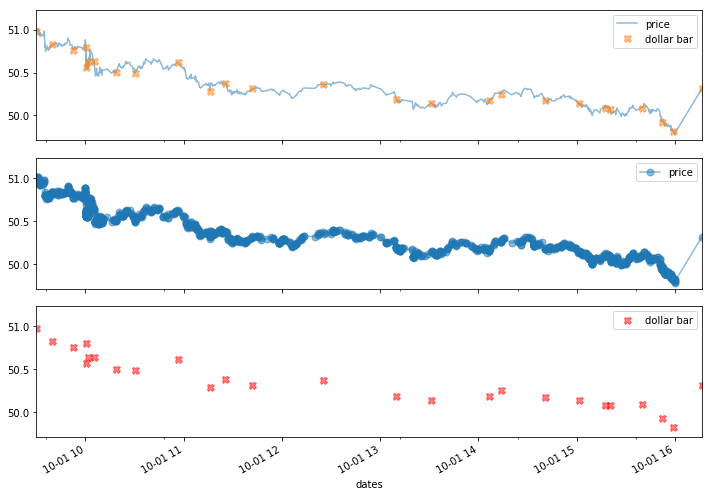

In [12]:
xdf, xtdf = bars.select_sample_data(df, dv_bar_df, 'price', xDate)
print(f'xdf shape: {xdf.shape}, xtdf shape: {xtdf.shape}')

bars.plot_sample_data(xdf, xtdf, 'dollar bar', alpha=0.5, markersize=7)  

tick count: 15,690
volume count: 66,638
dollar count: 57,493
raw count: 1,569,099


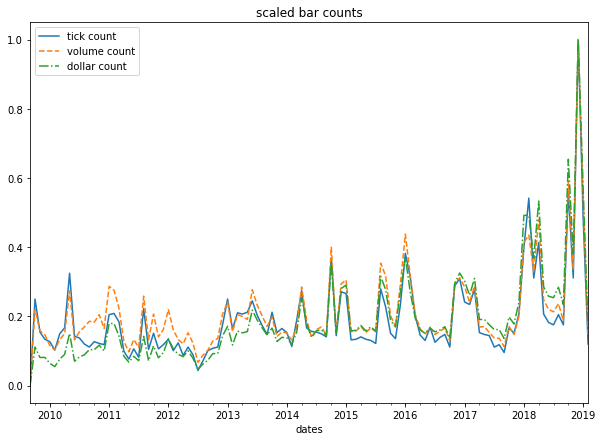

In [28]:
# count series
# scale to compare 'apples to apples'
tc = bars.scale(bars.count_bars(tick_df, '1M'))
vc = bars.scale(bars.count_bars(v_bar_df, '1M'))
dc = bars.scale(bars.count_bars(dv_bar_df, '1M'))
dfc = bars.scale(bars.count_bars(df, '1M'))

print(f'tick count: {tick_df.price.count():,}')
print(f'volume count: {v_bar_df.price.count():,}')
print(f'dollar count: {dv_bar_df.price.count():,}')
print(f'raw count: {df.price.count():,}')

# plot time series of count
# import visual tools
import matplotlib.pyplot as plt

f,ax=plt.subplots(figsize=(10,7))

tc.plot(ax=ax, ls='-', label='tick count')
vc.plot(ax=ax, ls='--', label='volume count')
dc.plot(ax=ax, ls='-.', label='dollar count')

ax.set_title('scaled bar counts')
ax.legend()